In [12]:
import os
import glob
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
kadfs = []
targets = []
for path in glob.glob("data/*/*"):
    targets.extend([os.path.split(path)[0]] * 30)
    kadfs.append(pd.read_csv(path))

In [3]:
data = pd.concat(kadfs, ignore_index=True)
data['target'] = targets
scaler = StandardScaler()
label_encoder = LabelEncoder()
data['target'] = label_encoder.fit_transform(data['target'])
features = ['accelerometer_X', 'accelerometer_Y', 'accelerometer_Z']
data_to_norm = data[features]
X = scaler.fit_transform(data_to_norm)

In [4]:
y = data['target']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<AxesSubplot:>

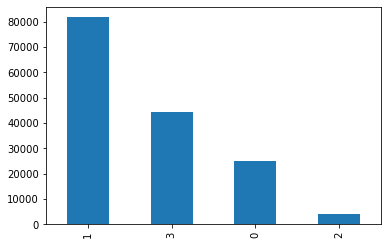

In [6]:
y_train.value_counts().plot(kind = 'bar')

In [7]:
models = [ 
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("SVM", SVC(kernel='linear', random_state=42))
    ]

results = {}

In [20]:
for name, model in models:
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, zero_division=1)
    
    results[name] = {
        'model': model,
        'classification_report': report,
        'matrix': matrix,
        'accuracy': accuracy,
        'y_pred': y_pred
    }

In [21]:
for name, result in results.items():
    print('Accuracy:')
    print(result['accuracy'])
    print(f'Classifier: {name}')
    print('Matrix:')
    print(result['matrix'])
    print(f'Classification_report:')
    print(result['classification_report'])

Accuracy:
0.9995873310636542
Classifier: Random Forest
Matrix:
[[ 6203     0     0     0]
 [    0 20484     0     1]
 [    4     5  1011     2]
 [    0     4     0 11058]]
Classification_report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6203
           1       1.00      1.00      1.00     20485
           2       1.00      0.99      0.99      1022
           3       1.00      1.00      1.00     11062

    accuracy                           1.00     38772
   macro avg       1.00      1.00      1.00     38772
weighted avg       1.00      1.00      1.00     38772

Accuracy:
0.8209790570514804
Classifier: SVM
Matrix:
[[ 4869  1311     0    23]
 [  828 17482     0  2175]
 [   13   292     0   717]
 [  270  1312     0  9480]]
Classification_report:
              precision    recall  f1-score   support

           0       0.81      0.78      0.80      6203
           1       0.86      0.85      0.86     20485
           2       1.0

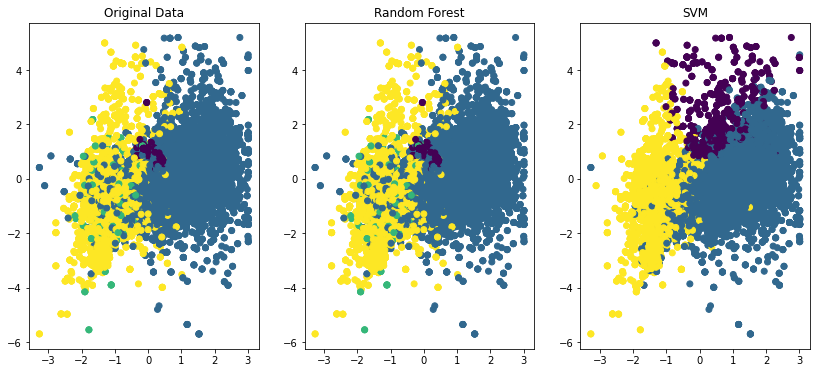

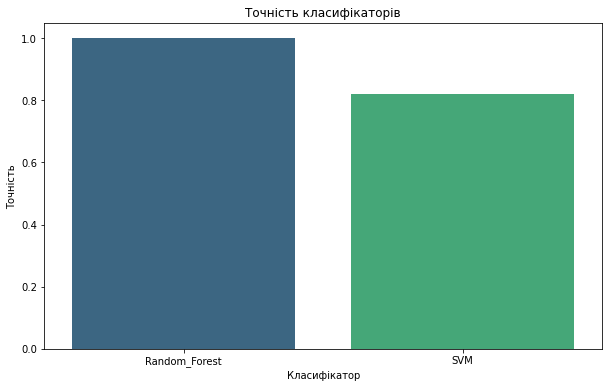

In [35]:


classifiers = []
accuracies = []
y_pr = []
for name, result in results.items():
    classifiers.append(name.replace(' ', '_'))
    accuracies.append(result['accuracy'])
    y_pr.append(result['y_pred'])

    
fig, ax = plt.subplots(1, 3, figsize = (14,6))
ax[0].scatter(X_test[:, 1], X_test[:, 2], c = y_test)
ax[0].set_title('Original Data')
ax[1].scatter(X_test[:, 1], X_test[:, 2], c = y_pr[0])
ax[1].set_title('Random Forest')
ax[2].scatter(X_test[:, 1], X_test[:, 2], c = y_pr[1])
ax[2].set_title('SVM')




# Візуалізація точності
plt.figure(figsize=(10, 6))
sns.barplot(x=classifiers, y=accuracies, palette="viridis")
plt.title('Точність класифікаторів')
plt.xlabel('Класифікатор')
plt.ylabel('Точність')

plt.show()